# Accuracy of velocity analysis as dependent on image size

## Preparation
Import of required modules and packages.

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pathlib import Path
from matplotlib.patches import Rectangle

from min_analysis_tools.get_auto_halfspan import get_auto_halfspan
from min_analysis_tools.local_velocity_analysis import local_velocity_analysis
from min_analysis_tools import peak_profile

# Reload modules automatically before executing code
%reload_ext autoreload
%autoreload 2

plt.rc("font", size=10)  # controls default text size
plt.rcParams.update({"font.family": "arial"})

In [2]:
# save set to True -> selected images saved to save_output
save = False
save_dpi = 150
cm = 1 / 2.54  # centimeters in inches (for matplotlib figure size)

## Selection

Select input path: (select square-shaped image)

In [3]:
stack_path = Path().cwd() / "example_data" / "paper_example.tif"

Load image: (do not change)

In [4]:
Min_st = io.imread(stack_path)
nt, ny, nx = np.shape(Min_st)

Select number of frames to analyse:

In [5]:
frames_to_analyse = 4  # analyse first .. frames (global/spatial and local analysis)

Select image dimensions in pixels. Images will be cropped to these sizes and analysed. For the sake of clarity, we show the crops here aligned on their top left corner. For the actual analysis, The position of cropped areas is varied at random to avoid selection bias.

In [6]:
dimensions = list(
    range(128, nx, 32)
)  # range: provide start, stop (= horizontal image size) and step
dimensions.reverse()  # reverse to go down from large to small

Display image and cropping regions:

Current file size: 512 pixels x 512 pixels


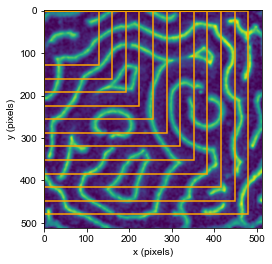

In [7]:
nt, ny, nx = np.shape(Min_st)
print(f"Current file size: {nx} pixels x {ny} pixels")
fig, ax = plt.subplots()
ax.imshow(Min_st[0, :, :])
ax.set_xlabel("x (pixels)")
ax.set_ylabel("y (pixels)")
for dim in dimensions:
    ax.add_patch(
        Rectangle(
            (0, 0), dim, dim, edgecolor="orange", facecolor="None", fill=True, lw=1.5
        )
    )

if save:
    fig.set_size_inches(5 * cm, 5 * cm)
    fig.tight_layout()
    fig.savefig(r"save_output\local_cropping_sizes.png", dpi=save_dpi, transparent=True)
plt.show()

## Local velocity analysis
Local velocity analysis is performed on a set number of images per movie. This yields a dataset of wave crest positions accompanied by local velocity vector. The magnitude of this vector is collected in a velocity distribution, from which we obtain a peak velocity and its corresponding FWHM.

## Settings

In [8]:
halfspan = None  # set to "None" to use automatic halfspan (recommended!)
sampling_width = 0.25  # in pixel units
edge = 30  # outer edge (+/-) for velocity wheel and velocity histogram
bins_wheel = 50  # number of horizontal/vertical bins for histogram wheels
binwidth_sum = 0.25  # binwidth for velocity magnitude histogram (in pixel/frame)
kernel_size_general = 20  # kernel for first smoothing step (smaller)
kernel_size_flow = 35  # building smoothening kernel needed for flow analysis (larger)

### Analyse full image stack

Current file size: 512 pixels x 512 pixels


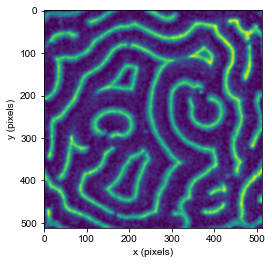

Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 3.50 pixels/frame
Median velocity magnitude: 12.46 pixels/frame


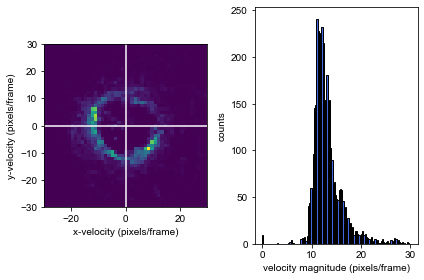

In [9]:
nt, ny, nx = np.shape(Min_st)
print(f"Current file size: {nx} pixels x {ny} pixels")
halfspan = get_auto_halfspan(Min_st, frames_to_analyse, verbose=False)

fig, ax = plt.subplots()
ax.imshow(Min_st[0, :, :])
ax.set_xlabel("x (pixels)")
ax.set_ylabel("y (pixels)")

if save:
    fig.set_size_inches(5 * cm, 5 * cm)
    fig.tight_layout()
    fig.savefig(
        r"save_output\local_cropping_sizes_full.png", dpi=save_dpi, transparent=True
    )
plt.show()

(
    velocities,  # velocity magnitude
    forward_wavevector_x,  # unit vector w_x
    forward_wavevector_y,  # unit vector w_y
    all_wheels,  # data generated for velocity wheel (2D histogram)
    crests_x,
    crests_y,
    framenr,
    max_x1,
    max_y1,
    max_x2,
    max_y2,
    fig,
    ax_wheel,
    ax_sum,
) = local_velocity_analysis(
    Min_st,
    frames_to_analyse,  # use first ... frames
    halfspan,
    sampling_width,
    edge,  # width of velocity wheel (2D histogram) and max of magnitude histogram
    bins_wheel,  # number of bins (horizontal/vertical) for velocity wheel (2D histogram)
    binwidth_sum,  # binwidth for velocity mangitude histogram
    kernel_size_general,  # kernel for first smoothing step
    kernel_size_flow,  # kernel for additional smoothing step
    look_ahead=1,  # 1 -> look in propagation direction, -1 -> against it
    demo=True,  # True -> return figure handles
)

bins = np.arange(0, edge + binwidth_sum, binwidth_sum)
(hist_prf, bin_edges) = np.histogram(velocities, bins)
pki = peak_profile.get_maxima(hist_prf, N_max=1)
fwhm_pix = peak_profile.get_FWHM(hist_prf, pki[0])
fwhm_pifr = binwidth_sum * fwhm_pix

ref_median = np.nanmedian(velocities)
ref_peak = bin_edges[pki[0]]
ref_FWHM = fwhm_pifr

if save:
    fig.set_size_inches(13 * cm, 5 * cm)
    fig.tight_layout()
    fig.savefig(
        r"save_output\local_cropping_sizes_full_results.png",
        dpi=save_dpi,
        transparent=True,
    )
plt.show()

### Analyse cropped image stacks
Next, crop the image stack further and perform the analysis again for every selected dimension.

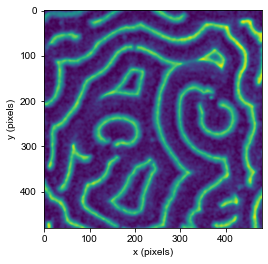

Cropped file size: 480 pixels x 480 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 3.50 pixels/frame
Median velocity magnitude: 12.42 pixels/frame


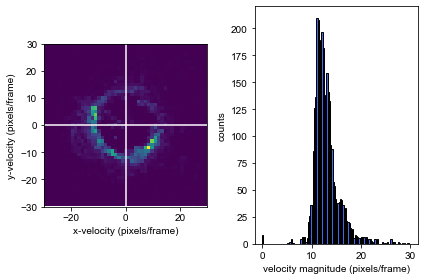

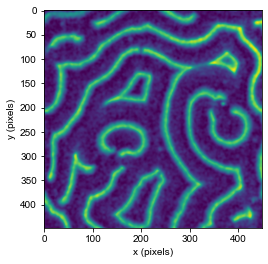

Cropped file size: 448 pixels x 448 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 3.50 pixels/frame
Median velocity magnitude: 12.44 pixels/frame


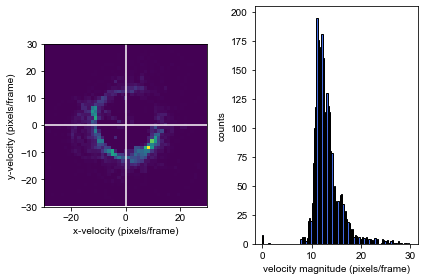

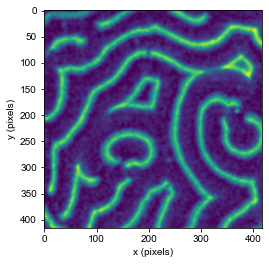

Cropped file size: 416 pixels x 416 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 3.25 pixels/frame
Median velocity magnitude: 12.35 pixels/frame


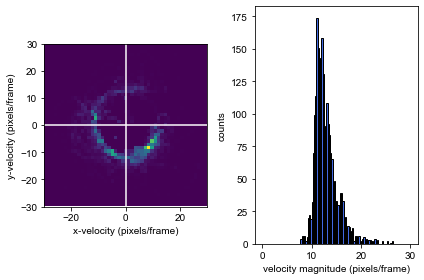

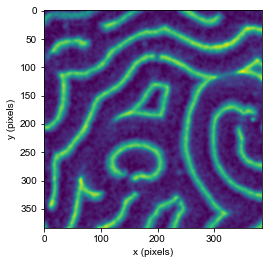

Cropped file size: 384 pixels x 384 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 2.25 pixels/frame
Median velocity magnitude: 12.17 pixels/frame


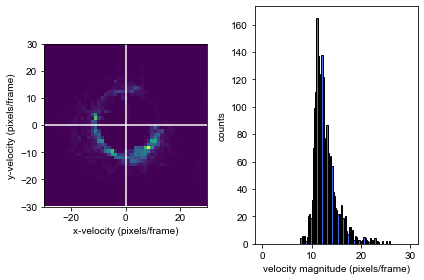

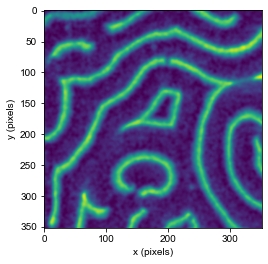

Cropped file size: 352 pixels x 352 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 2.25 pixels/frame
Median velocity magnitude: 12.07 pixels/frame


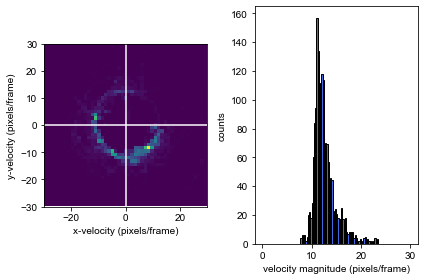

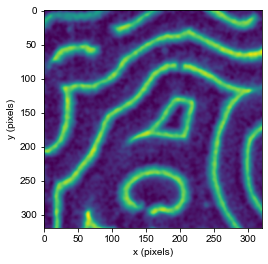

Cropped file size: 320 pixels x 320 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 2.00 pixels/frame
Median velocity magnitude: 11.97 pixels/frame


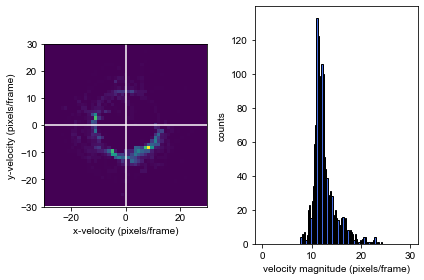

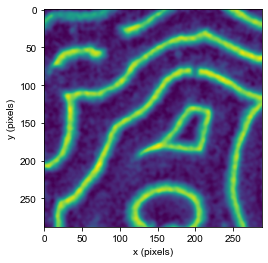

Cropped file size: 288 pixels x 288 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.00 pixels/frame
FWHM velocity magnitude: 1.75 pixels/frame
Median velocity magnitude: 11.98 pixels/frame


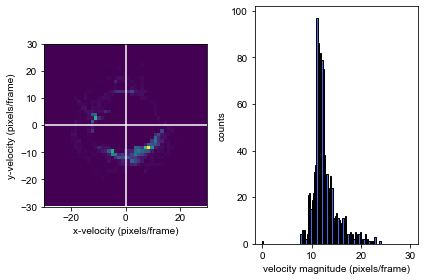

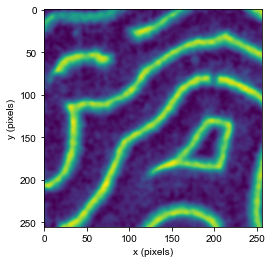

Cropped file size: 256 pixels x 256 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 12.00 pixels/frame
FWHM velocity magnitude: 1.75 pixels/frame
Median velocity magnitude: 12.06 pixels/frame


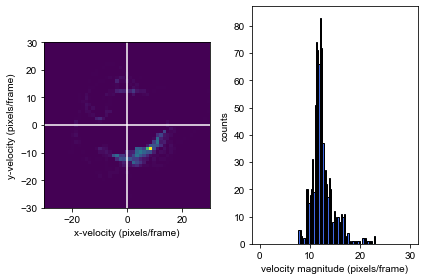

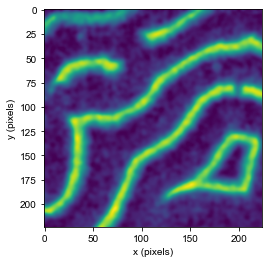

Cropped file size: 224 pixels x 224 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.50 pixels/frame
FWHM velocity magnitude: 1.50 pixels/frame
Median velocity magnitude: 11.90 pixels/frame


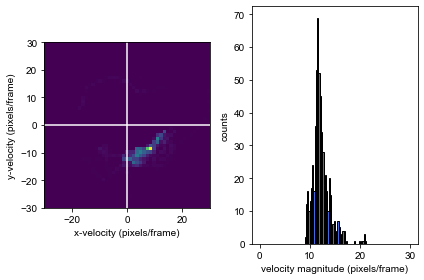

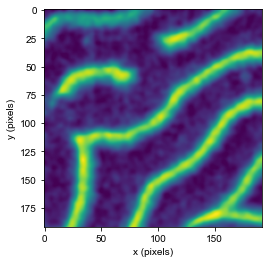

Cropped file size: 192 pixels x 192 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.50 pixels/frame
FWHM velocity magnitude: 1.50 pixels/frame
Median velocity magnitude: 11.88 pixels/frame


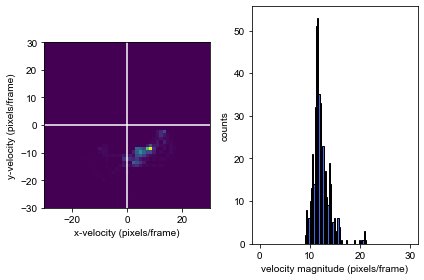

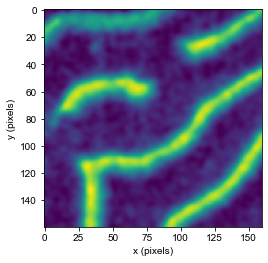

Cropped file size: 160 pixels x 160 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.50 pixels/frame
FWHM velocity magnitude: 1.25 pixels/frame
Median velocity magnitude: 12.01 pixels/frame


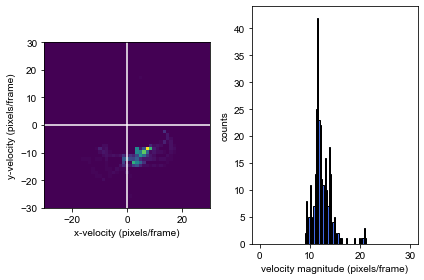

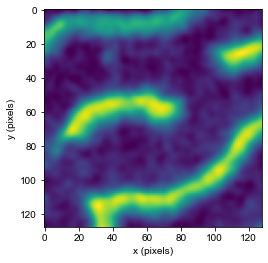

Cropped file size: 128 pixels x 128 pixels
Analysing 4 frames
Working frame 0 to 1
Working frame 1 to 2
Working frame 2 to 3
peak velocity magnitude: 11.50 pixels/frame
FWHM velocity magnitude: 1.25 pixels/frame
Median velocity magnitude: 12.71 pixels/frame


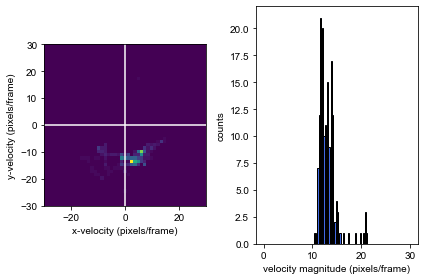

In [10]:
medianvelocity_collect = []
peakvelocity_collect = []
fwhm_velocity_collect = []

for dim in dimensions:
    # LR_0=int((np.random.uniform(0, nx-dim, 1)))
    # Min_st_new = Min_st[:,LR_0:LR_0+dim, LR_0:LR_0+dim]
    Min_st_new = Min_st[:, 0:dim, 0:dim]

    fig, ax = plt.subplots()
    ax.imshow(Min_st_new[0, :, :])
    ax.set_xlabel("x (pixels)")
    ax.set_ylabel("y (pixels)")

    if save:
        clear_output(wait=False)
        fig.set_size_inches(5 * cm, 5 * cm)
        fig.tight_layout()
        fig.savefig(
            f"save_output\local_cropping_{dim}_image.png",
            dpi=save_dpi,
            transparent=True,
        )
    plt.show()

    nt, ny, nx = np.shape(Min_st_new)
    print(f"Cropped file size: {nx} pixels x {ny} pixels")
    (
        velocities,  # velocity magnitude
        forward_wavevector_x,  # unit vector w_x
        forward_wavevector_y,  # unit vector w_y
        all_wheels,  # data generated for velocity wheel (2D histogram)
        crests_x,
        crests_y,
        framenr,
        max_x1,
        max_y1,
        max_x2,
        max_y2,
        fig,
        ax_wheel,
        ax_sum,
    ) = local_velocity_analysis(
        Min_st_new,
        frames_to_analyse,  # use first ... frames
        halfspan,
        sampling_width,
        edge,  # width of velocity wheel (2D histogram) and max of magnitude histogram
        bins_wheel,  # number of bins (horizontal/vertical) for velocity wheel (2D histogram)
        binwidth_sum,  # binwidth for velocity mangitude histogram
        kernel_size_general,  # kernel for first smoothing step
        kernel_size_flow,  # kernel for additional smoothing step
        look_ahead=1,  # 1 -> look in propagation direction, -1 -> against it
        demo=True,  # True -> return figure handles
    )

    # some extra numbers processed from the histogram
    bins = np.arange(0, edge + binwidth_sum, binwidth_sum)
    (hist_prf, bin_edges) = np.histogram(velocities, bins)
    pki = peak_profile.get_maxima(hist_prf, N_max=1)
    fwhm_pix = peak_profile.get_FWHM(hist_prf, pki[0])
    fwhm_pifr = binwidth_sum * fwhm_pix

    medianvelocity_collect.append(np.nanmedian(velocities))
    peakvelocity_collect.append(bin_edges[pki[0]])
    fwhm_velocity_collect.append(fwhm_pifr)

    if save:
        fig.set_size_inches(13 * cm, 5 * cm)
        fig.tight_layout()
        fig.savefig(
            f"save_output\local_cropping_{dim}_results.png",
            dpi=save_dpi,
            transparent=True,
        )
    plt.show()
plt.close("all")

## Results
In the following, we consider the peak velocity obtained for the peak velocity as reference and compare the results obtained for different image sizes.<br>
blue: median magnitude, green: peak magnitude (from histogram), magenta: peak magnitude for full area

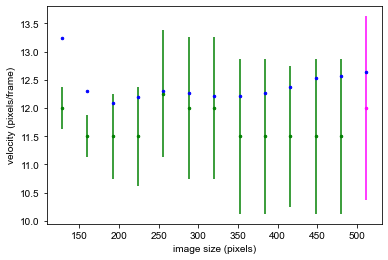

medianvelocity_collect=[12.564427017371877, 12.528486648659719, 12.374814436065911, 12.269853497852313, 12.215441225660966, 12.214217426882719, 12.264739051538685, 12.305824906238037, 12.201988929693094, 12.083772326648095, 12.297783377051456, 13.247042587095983]
peakvelocity_collect=[11.5, 11.5, 11.5, 11.5, 11.5, 12.0, 12.0, 12.25, 11.5, 11.5, 11.5, 12.0]
fwhm_velocity_collect=[2.75, 2.75, 2.5, 2.75, 2.75, 2.5, 2.5, 2.25, 1.75, 1.5, 0.75, 0.75]


In [11]:
fig, ax = plt.subplots()

ax.set_xlabel("image size (pixels)")
ax.set_ylabel("velocity (pixels/frame)")

for n, dim in enumerate(dimensions):
    wavelength_median = medianvelocity_collect[n]
    wavelength_peak = peakvelocity_collect[n]
    wavelength_std = fwhm_velocity_collect[n] / 2
    ax.errorbar(
        dim,
        wavelength_peak,
        yerr=wavelength_std,
        marker=".",
        markersize=5,
        color="green",
    )
    ax.plot(dim, wavelength_median, marker=".", markersize=5, color="blue")

nt, ny, nx = np.shape(Min_st)
ax.errorbar(nx, ref_peak, yerr=ref_FWHM / 2, marker=".", markersize=5, color="magenta")
ax.plot(nx, ref_median, marker=".", markersize=5, color="blue")

if save:
    fig.set_size_inches(13 * cm, 5 * cm)
    fig.tight_layout()
    fig.savefig(
        f"save_output\local_cropping_collected_results.png",
        dpi=save_dpi,
        transparent=True,
    )
plt.show()

print(f"{medianvelocity_collect=}")
print(f"{peakvelocity_collect=}")
print(f"{fwhm_velocity_collect=}")